# Decesion Trees

Decision Tree is a type of `supervised learning algorithm` that is mostly used in `classification problems`. 
It works for both `continuous` as well as `categorical output variables`. 

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

## **Important Terms for Decision Tree**

- **Root Node**: It represents the entire dataset, which further gets divided into two or more homogeneous sets.
- **Splitting**: It is a process of dividing a node into two or more sub-nodes.
- **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.
- **Leaf/Terminal Node**: Nodes do not split is called Leaf or Terminal node.
- **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.
- **Information Gain**: The `information gain` is based on the `decrease in entropy` after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
- **Entropy**: A decision tree algorithm always tries to maximize Information Gain. The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
- **Gini Index**: Gini index says, if we select two items from a population at random then they must be of the same class and probability for this is 1 if the population is pure.

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as snsa
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("data-set for decision tree.csv")
df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [3]:
import dtale

In [4]:
data_show = dtale.show(df)

In [5]:
data_show.open_browser()

In [6]:
data_show.kill()

2025-02-14 22:49:31,068 - INFO     - Executing shutdown...
2025-02-14 22:49:31,080 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [7]:
df.isnull().sum().sort_values(ascending=False)

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [8]:
# Encode the categorical and object variables using for loop and labelencoder
le = LabelEncoder()
for col in df.select_dtypes(include=['category', 'object']):
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,0,11,6,0,1,4,0,39,0
1,4,11,6,4,1,4,0,39,0
2,0,15,6,0,4,2,0,39,0
3,4,5,0,7,4,4,0,39,0
4,4,15,5,10,3,4,0,39,0


In [10]:
# split the data into X and y
X = df.drop(['income', 'education'], axis=1)
y = df['income']
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[4565  411]
 [ 772  765]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4976
           1       0.65      0.50      0.56      1537

    accuracy                           0.82      6513
   macro avg       0.75      0.71      0.72      6513
weighted avg       0.81      0.82      0.81      6513



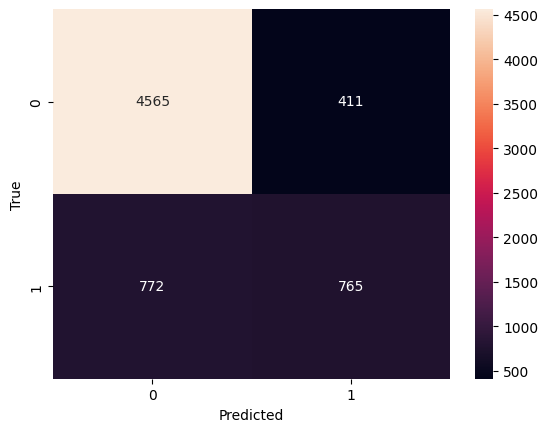

In [11]:
# create and train teh model with pred
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()